# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

In [1]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from see.Workflow import workflow


# Initialize Algorithm Space and Workflow
algorithm_space = Classifier.algorithmspace

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5



# Creating Trials
First, **preprocessing** of the provided dataset needs to occur prior to using the classifier pipeline.
We then split the dataset into a training and testing set. The **testing set** will be **stored**
away until the very end where it will be used to compare the best solutions found via Genetic Search.
Solutions will be compared in the form of **side-by-side plots**.
The **training set** will be **further split** into smaller trials that will be used to tune each generation
of algorithms during the Genetic Search algorithm.

In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from see.base_classes import pipedata
from see.classifier_helpers import helpers
import pandas as pd
import numpy as np

# Import/Create data
#X, y = make_moons(noise=0.3, random_state=15)
#X, y = make_circles(noise=0.2, factor=0.5, random_state=21)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
data = pd.read_csv(url, header=None)

In [3]:
X = data.iloc[:,2:].to_numpy()

def diagnosis_to_category(d):
    if d == 'M':
        return 0
    elif d == 'B':
        return 1
    else:
        print('WARNING: UNKNOWN Category')
y = np.vectorize(diagnosis_to_category)(data[1].to_numpy())

In [4]:
# Preprocess data
X = StandardScaler().fit_transform(X)

# Split data into training and testing sets
dataset = helpers.generate_train_test_set(X, y)

# Split training data into trials
trials = helpers.generate_tuning_trials(dataset.training_set.X, dataset.training_set.y)

folds.X [[-1.14948831 -0.97263226 -1.16193573 ... -1.58640167  0.05216418
  -0.38657061]
 [-1.12392703 -1.02615481 -1.12939548 ... -1.35236887  1.06165929
  -0.20757752]
 [-1.26423005 -1.43106449 -1.14710726 ... -0.1082036  -0.08534717
   2.90679142]
 ...
 [ 2.15359679 -0.4746399   2.01547631 ...  1.02617791 -0.63215701
  -1.0532229 ]
 [-0.58998034 -1.08433149 -0.57373967 ... -0.74802522 -0.24874301
  -0.05185908]
 [ 0.81873007  0.22580731  0.73034207 ... -0.07622775  0.60544515
  -1.06707685]]
folds.X [[ 0.87269277  1.2171379   0.91569797 ...  1.14646802  0.66692082
   2.76825187]
 [ 0.10017415  0.50505536  0.09395347 ...  0.12019536  0.1929111
  -0.85815922]
 [-0.65814375 -0.44206096 -0.68783653 ... -1.08940554  0.48411161
  -1.00778193]
 ...
 [ 2.15359679 -0.4746399   2.01547631 ...  1.02617791 -0.63215701
  -1.0532229 ]
 [-0.58998034 -1.08433149 -0.57373967 ... -0.74802522 -0.24874301
  -0.05185908]
 [ 0.81873007  0.22580731  0.73034207 ... -0.07622775  0.60544515
  -1.06707685]]
f

In [5]:
# Example run of the default Classifier on the generated trials
individual = Classifier()
data = individual.runAlgo(trials)
print(data)
print("The fitness score of the default classifier: ", ClassifierFitness().pipe(data).fitness)

<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5

Time: 3.772 s
The fitness score of the default classifier:  0.020460358056265986


## Genetic Search with Classifiers

In [6]:
from see import GeneticSearch

In [7]:
mydata = trials
num_generations = 30
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=10, hof_size=num_generations)

In [8]:
# warnings may appear when this runs
population = my_evolver.run(ngen=num_generations)

Initializing a new random population
Generation 0/30 of population size 10
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 189
	alpha = 0.1776
	max_depth = 866
	n_estimators = 536
	n_neighbors = 265

Time: 0.038 s
fitness=0.09083546462063086

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 159
	alpha = 0.1266
	max_depth = 721
	n_estimators = 1000
	n_neighbors = 827

Time: 10.987 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 387
	alpha = 0.0017
	max_depth = 475
	n_estimators = 778
	n_neighbors = 774

Time: 3.462 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 233
	alpha = 0.1046
	max_depth = 139
	n_estimators = 980
	n_neighbors = 247

Time: 3.731 s
fitness=0.02340153452685422

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 565


Time: 3.756 s
fitness=0.02340153452685422

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 387
	alpha = 0.9267
	max_depth = 475
	n_estimators = 778
	n_neighbors = 917

Time: 3.996 s
fitness=0.0263000852514919

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 407
	alpha = 0.0017
	max_depth = 367
	n_estimators = 123
	n_neighbors = 774

Time: 4.062 s
fitness=0.02340153452685422

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 233
	alpha = 0.4616
	max_depth = 139
	n_estimators = 980
	n_neighbors = 247

Time: 3.489 s
fitness=0.0263000852514919

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 884
	alpha = 0.1046
	max_depth = 338
	n_estimators = 644
	n_neighbors = 312

Time: 3.955 s
fitness=0.020460358056265986

#BEST [0.020460358056265986,  ['MLP Neural Network', 884, 0.1046, 338, 644, 312]]
Mutating Population
using workflow mutat

Time: 3.862 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 884
	alpha = 0.1046
	max_depth = 338
	n_estimators = 644
	n_neighbors = 312

Time: 3.899 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 884
	alpha = 0.1046
	max_depth = 338
	n_estimators = 644
	n_neighbors = 312

Time: 4.237 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 407
	alpha = 0.0017
	max_depth = 367
	n_estimators = 123
	n_neighbors = 774

Time: 4.11 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 387
	alpha = 0.0017
	max_depth = 475
	n_estimators = 123
	n_neighbors = 774

Time: 3.941 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 407
	alpha = 0.9267
	max_dep

Time: 9.549 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 558
	alpha = 0.2332
	max_depth = 946
	n_estimators = 917
	n_neighbors = 785

Time: 0.025 s
fitness=0.09961636828644502

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 691
	alpha = 0.5408
	max_depth = 356
	n_estimators = 967
	n_neighbors = 140

Time: 3.529 s
fitness=0.0263000852514919

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 691
	alpha = 0.5408
	max_depth = 356
	n_estimators = 967
	n_neighbors = 140

Time: 3.566 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 387
	alpha = 0.1046
	max_depth = 475
	n_estimators = 644
	n_neighbors = 312

Time: 3.266 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 967
	alpha = 0.0806
	max_depth = 45

Time: 5.537 s
fitness=0.04096334185848253

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 735
	alpha = 0.9776
	max_depth = 649
	n_estimators = 695
	n_neighbors = 915

Time: 11.119 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 899
	alpha = 0.7427
	max_depth = 915
	n_estimators = 212
	n_neighbors = 175

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.071 s
fitness=0.20238704177323102

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 967
	alpha = 0.0017
	max_depth = 454
	n_estimators = 702
	n_neighbors = 774

Time: 7.376 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 884
	alpha = 0.0806
	max_depth = 454
	n_estimators = 123
	n_neighbors = 188

Time: 5.584 s
fitness=0.020460358056265986

<class 'see.Work

Time: 6.418 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 23
	alpha = 0.6724
	max_depth = 520
	n_estimators = 852
	n_neighbors = 983

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.008 s
fitness=0.07024722932651321

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 126
	alpha = 0.7692
	max_depth = 623
	n_estimators = 449
	n_neighbors = 726

Time: 3.99 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 115
	alpha = 0.3176
	max_depth = 490
	n_estimators = 986
	n_neighbors = 104

Time: 0.026 s
fitness=0.08785166240409208

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 884
	alpha = 0.0806
	max_depth = 454
	n_estimators = 123
	n_neighbors = 188

Time: 3.865 s
fitness=0.02634271099744246

<class 'see.Workflo

Time: 4.859 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 986
	alpha = 0.6634
	max_depth = 268
	n_estimators = 771
	n_neighbors = 201

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.031 s
fitness=0.3196078431372549

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 835
	alpha = 0.6679
	max_depth = 978
	n_estimators = 291
	n_neighbors = 549

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.023 s
fitness=0.046930946291560104

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 136
	alpha = 0.7147
	max_depth = 677
	n_estimators = 883
	n_neighbors = 652

Time: 9.779 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 387
	alpha = 0.0017
	max_depth =

Time: 4.122 s
fitness=0.0263000852514919

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 130
	alpha = 0.8885
	max_depth = 661
	n_estimators = 449
	n_neighbors = 570

Time: 0.025 s
fitness=0.09083546462063087

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 117
	alpha = 0.0342
	max_depth = 507
	n_estimators = 610
	n_neighbors = 75

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.031 s
fitness=0.0674765558397272

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 443
	alpha = 0.0611
	max_depth = 774
	n_estimators = 421
	n_neighbors = 327

Time: 0.026 s
fitness=0.09381926683716965

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 320
	alpha = 0.3639
	max_depth = 691
	n_estimators = 771
	n_neighbors = 956

Time: 8.655 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> 

Time: 4.066 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 686
	alpha = 0.3554
	max_depth = 199
	n_estimators = 212
	n_neighbors = 712

Time: 2.394 s
fitness=0.04096334185848253

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 515
	alpha = 0.2838
	max_depth = 218
	n_estimators = 945
	n_neighbors = 694

Time: 9.911 s
fitness=0.04096334185848253

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 586
	alpha = 0.4563
	max_depth = 481
	n_estimators = 245
	n_neighbors = 374

Time: 0.025 s
fitness=0.09667519181585678

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 870
	alpha = 0.9803
	max_depth = 773
	n_estimators = 923
	n_neighbors = 896

Time: 10.478 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 227
	alpha = 0.3637
	max_depth = 898
	n_estimator

Time: 5.287 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 629
	alpha = 0.3637
	max_depth = 810
	n_estimators = 385
	n_neighbors = 649

Time: 3.844 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 227
	alpha = 0.3637
	max_depth = 898
	n_estimators = 866
	n_neighbors = 166

Time: 4.292 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 629
	alpha = 0.0236
	max_depth = 454
	n_estimators = 702
	n_neighbors = 188

Time: 4.66 s
fitness=0.02340153452685422

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 884
	alpha = 0.0017
	max_depth = 810
	n_estimators = 385
	n_neighbors = 649

Time: 7.061 s
fitness=0.023358908780903666

#BEST [0.023358908780903666,  ['MLP Neural Network', 629, 0.3637, 810, 385, 649]]
Mutating Population
using workflow m

Time: 4.073 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 629
	alpha = 0.3637
	max_depth = 810
	n_estimators = 866
	n_neighbors = 649

Time: 3.484 s
fitness=0.0263000852514919

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 227
	alpha = 0.3637
	max_depth = 898
	n_estimators = 385
	n_neighbors = 166

Time: 3.851 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 629
	alpha = 0.0236
	max_depth = 810
	n_estimators = 385
	n_neighbors = 649

Time: 4.095 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 884
	alpha = 0.0017
	max_depth = 454
	n_estimators = 702
	n_neighbors = 188

Time: 3.679 s
fitness=0.023358908780903666

#BEST [0.023358908780903666,  ['MLP Neural Network', 629, 0.3637, 810, 385, 649]]
Mutating Population
using workflow m

Time: 3.981 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 850
	alpha = 0.4039
	max_depth = 123
	n_estimators = 299
	n_neighbors = 258

Time: 3.853 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 826
	alpha = 0.4528
	max_depth = 673
	n_estimators = 739
	n_neighbors = 14

Time: 3.881 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 942
	alpha = 0.7956
	max_depth = 891
	n_estimators = 354
	n_neighbors = 930

Time: 4.915 s
fitness=0.04096334185848253

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 884
	alpha = 0.0017
	max_depth = 810
	n_estimators = 702
	n_neighbors = 188

Time: 4.1 s
fitness=0.0263000852514919

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 629
	alpha = 0.0236
	max_depth = 810
	

Time: 3.765 s
fitness=0.0263000852514919

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 862
	alpha = 0.7409
	max_depth = 383
	n_estimators = 398
	n_neighbors = 1000

Time: 4.169 s
fitness=0.04096334185848253

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 572
	alpha = 0.8512
	max_depth = 698
	n_estimators = 456
	n_neighbors = 368

RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
RUNNING EVAL FOR GNB
Time: 0.009 s
fitness=0.07024722932651321

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 170
	alpha = 0.5891
	max_depth = 513
	n_estimators = 806
	n_neighbors = 271

Time: 0.023 s
fitness=0.08209718670076727

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 855
	alpha = 0.9375
	max_depth = 41
	n_estimators = 510
	n_neighbors = 200

Time: 3.73 s
fitness=0.02634271099744246

<class 'see.Workflow.workf

Time: 10.34 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 604
	alpha = 0.8453
	max_depth = 617
	n_estimators = 926
	n_neighbors = 514

Time: 10.188 s
fitness=0.038064791133844846

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 390
	alpha = 0.3158
	max_depth = 997
	n_estimators = 431
	n_neighbors = 776

Time: 3.751 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 888
	alpha = 0.3985
	max_depth = 246
	n_estimators = 815
	n_neighbors = 353

Time: 3.853 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 1000
	alpha = 0.4349
	max_depth = 112
	n_estimators = 434
	n_neighbors = 362

Time: 0.031 s
fitness=0.07919863597612958

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 917
	alpha = 0.7347
	max_depth = 378

Time: 3.769 s
fitness=0.02340153452685422

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 773
	alpha = 0.0242
	max_depth = 538
	n_estimators = 717
	n_neighbors = 490

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.036 s
fitness=0.3783034953111679

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 347
	alpha = 0.227
	max_depth = 85
	n_estimators = 795
	n_neighbors = 608

Time: 3.858 s
fitness=0.0263000852514919

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 581
	alpha = 0.6857
	max_depth = 852
	n_estimators = 992
	n_neighbors = 211

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.042 s
fitness=0.3635976129582268

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 767
	alpha = 0.1636
	max_depth = 1

Time: 3.839 s
fitness=0.03512361466325661

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 96
	alpha = 0.4141
	max_depth = 36
	n_estimators = 199
	n_neighbors = 693

Time: 0.023 s
fitness=0.08508098891730606

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 99
	alpha = 0.3972
	max_depth = 784
	n_estimators = 891
	n_neighbors = 314

Time: 3.546 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 405
	alpha = 0.4869
	max_depth = 329
	n_estimators = 27
	n_neighbors = 690

Time: 3.586 s
fitness=0.020460358056265986

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 390
	alpha = 0.3985
	max_depth = 997
	n_estimators = 815
	n_neighbors = 776

Time: 3.449 s
fitness=0.023358908780903666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 390
	alpha = 0.3985
	max_depth = 378
	

In [9]:
print(my_evolver.hof[0].fitness.values[0]) # The best solution in each generation
print(my_evolver.best_avgs) # The fitness score of the best of each generation

0.020460358056265986
[0.0802770673486786, 0.07060102301790282, 0.08410059676044332, 0.044488491048593364, 0.0313000852514919, 0.04834185848252346, 0.056564364876385345, 0.05771952259164537, 0.0606692242114237, 0.0729411764705882, 0.04095907928388747, 0.06942028985507248, 0.06181585677749359, 0.05240835464620632, 0.04275362318840581, 0.02777919863597613, 0.03745098039215687, 0.036858482523444175, 0.04684143222506395, 0.03921994884910487, 0.0497911338448423, 0.04895140664961638, 0.02748508098891731, 0.038026427962489354, 0.0365686274509804, 0.06597612958226769, 0.03101875532821825, 0.04067774936061382, 0.09318414322250639, 0.04126172208013641, 0.03482523444160273]


## Final Comparison
We compare the found solutions using the testing set that was set aside at the very beginning.
We also train the classifiers using the training set that was made at the very beginning.

*TODO*: I'm not sure if it is correct to retrain the classifiers using the entire training
set. There might be issues with overfitting...

*TODO*: The plots below work nicely because we have two dimension data. Think about what to
do when the feature space is multidimensional.

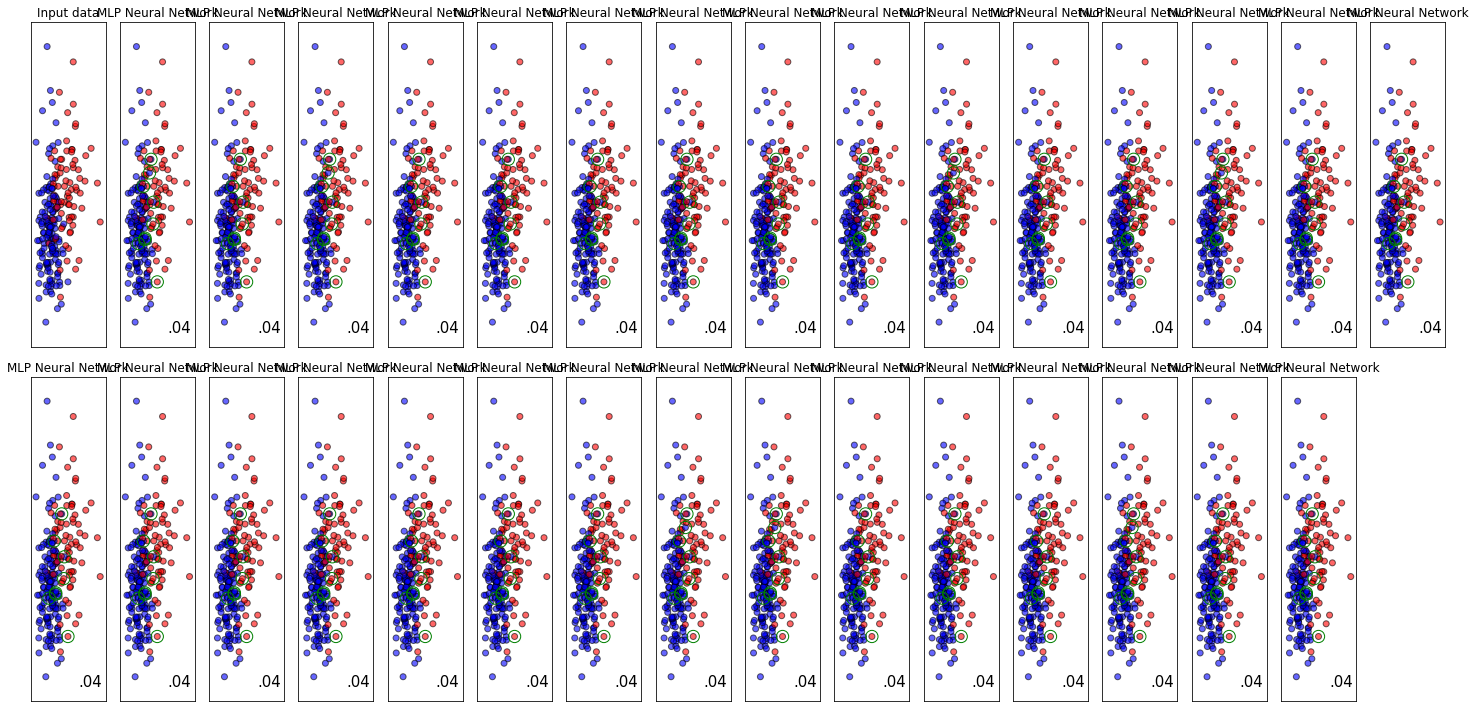

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

solution_set = my_evolver.hof

# Use stored away testing set and the entire training set for final comparisons
training_set = dataset.training_set
testing_set = dataset.testing_set

# TODO: Algorithms may be non-deterministic so fitness scores may change
# on different plot iterations...?

# Color Maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Create Mesh Grid
h = 0.02
x_min, x_max = testing_set.X[:, 0].min() - .5, testing_set.X[:, 0].max() + .5
y_min, y_max = testing_set.X[:, 1].min() - .5, testing_set.X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(20, 10))

ax = plt.subplot(2,round(len(solution_set)/2) + 1,1)

# Plot the training points and testing points (Input data)
#ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
#           edgecolors='k')
ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=testing_set.y, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

# Format plot
ax.set_title("Input data")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

for i, ind in enumerate(solution_set):
    # Initialize classifier
    algo_name = ind[0]
    param_list = ind
    clf = Classifier.algorithmspace[algo_name](param_list)
    
    predictions = clf.evaluate(training_set, testing_set)

    ax = plt.subplot(2, round(len(solution_set)/2) + 1,i + 2)

    # Plot predictions and fitness score
    ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    score = ClassifierFitness().evaluate(predictions, testing_set.y)
    
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

    # Draw Contour/Color Plot
    # TODO: We have to retrain the data set because we
    # we do not store the classifier created in clf#evaluate
    # anywhere. Consider storing it as an attribute.

    #contour_set = pipedata()
    #contour_set.X = np.c_[xx.ravel(), yy.ravel()]
    #Z = clf.evaluate(training_set, contour_set)
    #Z = Z.reshape(xx.shape)
    
    #ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
    
    # Highlight/circle errors
    errors = testing_set.X[predictions != testing_set.y]
    for mistake in errors:
        #err = testing_set.X[mistake,:]
        ax.scatter(mistake[0], mistake[1], marker='o', s=150, lw=1, color="green", facecolor="none")

    # Format plot
    ax.set_title(algo_name)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()

In [11]:
my_evolver.hof[0]
print(my_evolver.hof)

[['MLP Neural Network', 405, 0.4869, 329, 27, 690], ['MLP Neural Network', 390, 0.3985, 997, 815, 776], ['MLP Neural Network', 390, 0.3158, 378, 183, 971], ['MLP Neural Network', 884, 0.0236, 810, 385, 188], ['MLP Neural Network', 888, 0.3985, 246, 815, 353], ['MLP Neural Network', 390, 0.3158, 997, 431, 776], ['MLP Neural Network', 917, 0.7347, 378, 183, 971], ['MLP Neural Network', 629, 0.3637, 898, 385, 166], ['MLP Neural Network', 884, 0.0017, 810, 702, 188], ['MLP Neural Network', 629, 0.0236, 454, 385, 649], ['MLP Neural Network', 629, 0.3637, 810, 385, 649], ['MLP Neural Network', 227, 0.3637, 898, 866, 166], ['MLP Neural Network', 629, 0.0236, 810, 385, 649], ['MLP Neural Network', 884, 0.0017, 454, 702, 188], ['MLP Neural Network', 395, 0.2961, 263, 573, 398], ['MLP Neural Network', 68, 0.7679, 174, 62, 936], ['MLP Neural Network', 387, 0.0017, 356, 967, 140], ['MLP Neural Network', 387, 0.0806, 356, 967, 140], ['MLP Neural Network', 967, 0.0017, 454, 702, 188], ['MLP Neural N

In [12]:
list(map(lambda ind: ind.fitness.values[0], my_evolver.hof))

[0.020460358056265986,
 0.023358908780903666,
 0.023358908780903666,
 0.020460358056265986,
 0.020460358056265986,
 0.020460358056265986,
 0.020460358056265986,
 0.020460358056265986,
 0.0263000852514919,
 0.020460358056265986,
 0.023358908780903666,
 0.023358908780903666,
 0.020460358056265986,
 0.023358908780903666,
 0.020460358056265986,
 0.023358908780903666,
 0.023358908780903666,
 0.02625745950554135,
 0.020460358056265986,
 0.02634271099744246,
 0.020460358056265986,
 0.020460358056265986,
 0.020460358056265986,
 0.02340153452685422,
 0.020460358056265986,
 0.020460358056265986,
 0.023358908780903666,
 0.023358908780903666,
 0.023358908780903666,
 0.023358908780903666]

# Comparing Genetic Search and final test

([<matplotlib.axis.XTick at 0x7ff4f89104f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

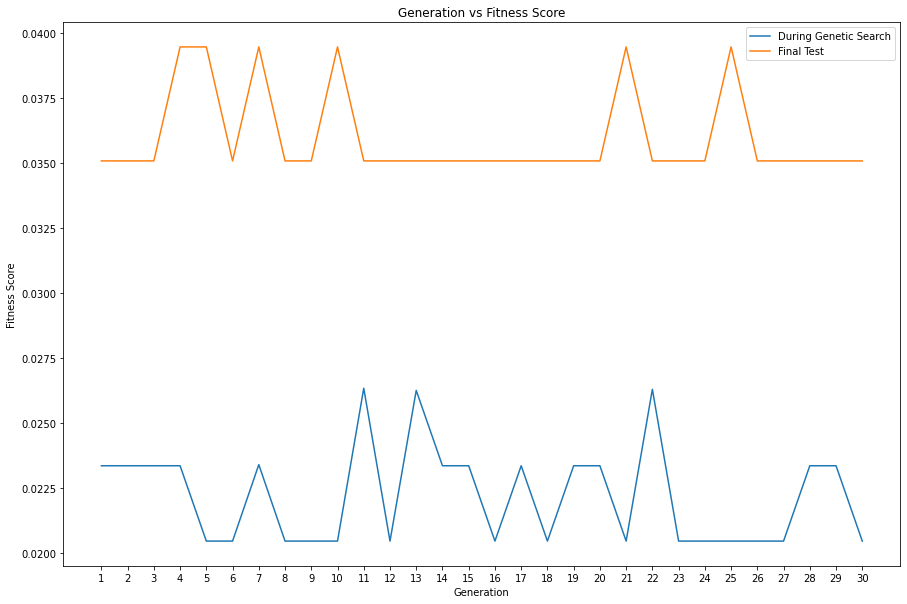

In [13]:
import matplotlib.pyplot as plt

# The following plot shows:
# 1) The fitness scores of the best individual of each generation during Genetic Search
# 2) The fitness scores of the best individual of each generation when tested on the unseen testing set

solution_set = my_evolver.hof

x = range(1, num_generations + 1)
#x = range(num_generations, 0, -1)

# Extract fitness scores during Genetic Search
y_1 = list(map(lambda ind: ind.fitness.values[0], solution_set))
y_1.reverse()

def score_clf(algo_vector, testing_set):
    algo_name = algo_vector[0]
    param_list = algo_vector
    targets = testing_set.y
    clf = Classifier.algorithmspace[algo_name](param_list)
    predictions = clf.evaluate(training_set, testing_set)
    return ClassifierFitness().evaluate(predictions, targets)
    
y_2 = list(map(lambda ind: score_clf(ind, testing_set), solution_set))
y_2.reverse()

figure = plt.figure(figsize=(15, 10))
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.legend(['During Genetic Search', 'Final Test'])
plt.title('Generation vs Fitness Score')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.xticks(x)